In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from google.colab import drive
import os

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
datasetCora="cora"
datasetCiteseer="citeseer"
pathsaveCora="/content/drive/My Drive/Colab Notebooks/TESI/save/"+datasetCora+"/"
pathsaveCiteseer="/content/drive/My Drive/Colab Notebooks/TESI/save/"+datasetCiteseer+"/"
pathsalvataggiCora=pathsaveCora+'salvataggiCora.pt'
pathsavedataframeCora=pathsaveCora+'dataframeCora.pt'
pathsalvataggiCiteseer=pathsaveCiteseer+'salvataggiCiteSeer.pt'
pathsavedataframeCiteseer=pathsaveCiteseer+'dataframeCiteSeer.pt'
pathplot="/content/drive/My Drive/Colab Notebooks/TESI/plot/"

In [4]:
datiCora=torch.load(pathsalvataggiCora)
datiCiteseer=torch.load(pathsalvataggiCiteseer)
dataframeCora=torch.load(pathsavedataframeCora)
dataframeCitesser=torch.load(pathsavedataframeCiteseer)

In [5]:
dataframeCora

Modelli   BestAUC   BestACC  ...  FattoreRiduzione   lossMin  NumFeatures
0    modello0  0.739574  0.645197  ...               1.5  0.636166         1433
1    modello1  0.775238  0.634279  ...               1.5  0.618343         1433
2    modello2  0.761060  0.639738  ...               1.5  0.631665         1433
3    modello3  0.887762  0.754367  ...               1.5  0.479629         1433
4    modello4  0.831584  0.732533  ...               1.5  0.547104         1433
..        ...       ...       ...  ...               ...       ...          ...
91  modello91  0.861322  0.766376  ...              10.0  0.526391         1433
92  modello92  0.836294  0.769651  ...              10.0  0.529825         1433
93  modello93  0.864536  0.764192  ...              10.0  0.506071         1433
94  modello94  0.806035  0.712882  ...              10.0  0.607383         1433
95  modello95  0.787028  0.706332  ...              10.0  0.557382         1433

[96 rows x 10 columns]

In [6]:
dataframeCitesser

Modelli   BestAUC   BestACC  ...  FattoreRiduzione   lossMin  NumFeatures
0    modello0  0.746071  0.660584  ...               1.5  0.603915         3703
1    modello1  0.790293  0.627737  ...               1.5  0.579813         3703
2    modello2  0.827588  0.691606  ...               1.5  0.541778         3703
3    modello3  0.874674  0.711679  ...               1.5  0.523377         3703
4    modello4  0.867921  0.755474  ...               1.5  0.501483         3703
..        ...       ...       ...  ...               ...       ...          ...
91  modello91  0.879216  0.775547  ...              10.0  0.548563         3703
92  modello92  0.872409  0.771898  ...              10.0  0.532786         3703
93  modello93  0.810765  0.709854  ...              10.0  0.590200         3703
94  modello94  0.886582  0.777372  ...              10.0  0.475144         3703
95  modello95  0.828001  0.713504  ...              10.0  0.557269         3703

[96 rows x 10 columns]

Plot su y AUC e acc

su x il variare di un parametro fissati gli altri

esempio tutti i modelli con 1 layer gat e tot head, plot auc e acc al variare del num di featurein uscita o head

Fai ciò per modello che performa meglio in termini di accuracy.
Per essere più chiari, questo ha L layer, H head e O output features, in un grafico fissa L e H ed in un altro L e O.




48 con livLin 1 | 24 con livLin 2 | 24 con livLin 3 

16 con livLGat 1 | 32 con livLGat 2 | 32 con livLGat 3 | 16 con livLGat 4

64 con Head 1 | 32 con Head 4

48 con output 40 | 48 con output 20

24 con FattoreRiduzione 1.5 | 24 con FattoreRiduzione 2 | 24 con FattoreRiduzione 5  | 24 con FattoreRiduzione 10 


In [7]:
bauc,bacc,ll,lg,h,out,fr=dataframeCitesser.keys()[1:8]
livlin=[1,2,3]
livgat=[1,2,3,4]
head=[1,4]
outfeat=[20,40]
fatrid=[1.5,2,5,10]

In [8]:
df=dataframeCora
df=df.loc[df[out]==40]
df=df.loc[df[ll]==1]
df=df.loc[df[h]==1]
df=df.loc[df[fr]==1.5]
df

Modelli   BestAUC   BestACC  ...  FattoreRiduzione   lossMin  NumFeatures
2    modello2  0.761060  0.639738  ...               1.5  0.631665         1433
6    modello6  0.869694  0.782751  ...               1.5  0.465529         1433
10  modello10  0.881598  0.796943  ...               1.5  0.464334         1433
14  modello14  0.900801  0.825328  ...               1.5  0.399081         1433

[4 rows x 10 columns]

In [ ]:
#dataframeCora,dataframeCitesser

#CONSIDERO LA VARIAZIONE DEI LIVELLI GAT E BLOCCO TUTTI ALTRI PARAMETRI

In [92]:
dizionario={}
for data in [dataframeCitesser]:#,dataframeCora]:
  numf=data["NumFeatures"][0]
  if numf>3000: dataset="Citeseer"
  else: dataset="Cora"
  for a in ["BestAUC","BestACC"]:
    path=pathplot+dataset+"/Variazione Livelli Gat "+a
    #os.makedirs(path) 
    for f in fatrid:
      for llin in livlin:
        for he in head:
          for outf in outfeat:
            df=data
            df=df.loc[df[out]==outf]
            df=df.loc[df[ll]==llin]
            df=df.loc[df[h]==he]
            df=df.loc[df[fr]==f]
            if len(df)>3:
              x = df[lg]
              y1 = df[a]
              d={}
              d["LivelliGat"]=list(x)
              d[a]=list(y1)
              dizionario[a+" modello LivelliLineanri: "+str(llin)+" Head: "+str(he)+" OutFeat: "+str(outf)+" FattoreRiduzione: "+str(f)]=d
              title=dataset+" " +a+" VARIAZIONE DI LIVELLI GAT \n LivelliLineanri: "+str(llin)+" Head: "+str(he)+" OutFeat: "+str(outf)+" FattoreRiduzione: "+str(f)
              save=dataset+" " + a+" VARIAZIONE DI LIVELLI GAT LivelliLineanri: "+str(llin)+" Head: "+str(he)+" OutFeat: "+str(outf)+" FattoreRiduzione: "+str(f)
              '''plt.figure()
              plt.title(title) 
              plt.xlabel('LIVELLI GAT', fontsize=12)
              plt.ylabel(a, fontsize=12)
              plt.plot(x,y1)'''
              #plt.savefig(path+"/"+save+'.png')

best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

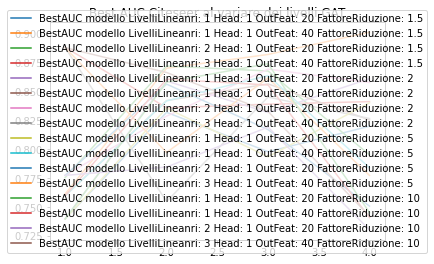

In [100]:
for d in dizionario:
  if "BestAUC" in dizionario[d].keys():
    x=dizionario[d]["LivelliGat"]
    y1=dizionario[d]["BestAUC"]
    plt.title("Best AUC Citeseer al variare dei livelli GAT")
    #plt.plot(x,y1)
    plt.plot(x,y1,label=d)
    plt.savefig('citeSeerBestAucVariazioneGATModelli.png')
    plt.legend(loc="center")

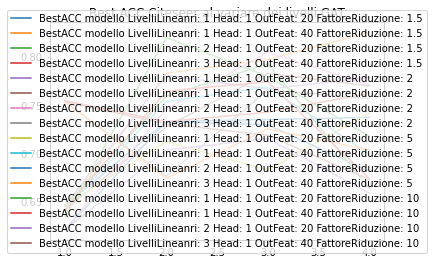

In [101]:
for d in dizionario:
  if "BestACC" in dizionario[d].keys():
    x=dizionario[d]["LivelliGat"]
    y1=dizionario[d]["BestACC"]
    plt.title("Best ACC Citeseer al variare dei livelli GAT")
    #plt.plot(x,y1)
    plt.plot(x,y1,label=d)
    plt.savefig('citeseerBestAccVariazioneGATModelli.png')
    plt.legend(loc="center")

#CONSIDERO LA VARIAZIONE DEI LIVELLI LINEARI E BLOCCO TUTTI ALTRI PARAMETRI

In [63]:
dizionario={}
for data in [dataframeCora]:
  numf=data["NumFeatures"][0]
  if numf>3000: dataset="Citeseer"
  else: dataset="Cora"
  for a in ["BestAUC","BestACC"]:
    path=pathplot+dataset+"/Variazione Livelli Lineari "+a
    #os.makedirs(path) 
    for f in fatrid:
      for livelligat in livgat:
        for he in head:
          for outf in outfeat:
            df=data
            df=df.loc[df[out]==outf]
            df=df.loc[df[lg]==livelligat]
            df=df.loc[df[h]==he]
            df=df.loc[df[fr]==f]
            if len(df)>1:
              x = df[ll]
              y1 = df[a]
              d={}
              d["LivelliLineari"]=list(x)
              d[a]=list(y1)
              dizionario[a+" modello LivelliGat: "+str(livelligat)+" Head: "+str(he)+" OutFeat: "+str(outf)+" FattoreRiduzione: "+str(f)]=d
              title=dataset+" " +a+" VARIAZIONE DI LIVELLI LIN \n LivelliGat: "+str(livelligat)+" Head: "+str(he)+" OutFeat: "+str(outf)+" FattoreRiduzione: "+str(f)
              save=dataset+" " +a+" VARIAZIONE DI LIVELLI LIN LivelliGat: "+str(livelligat)+" Head: "+str(he)+" OutFeat: "+str(outf)+" FattoreRiduzione: "+str(f)
              '''plt.figure()
              plt.title(title) 
              plt.xlabel('LIVELLI LIN', fontsize=12)
              plt.ylabel(a, fontsize=12)
              plt.plot(x,y1)
              plt.savefig(path+"/"+save+'.png')'''

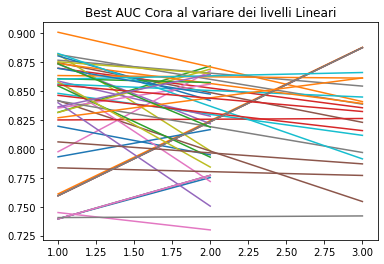

In [66]:
for d in dizionario:
  if "BestAUC" in dizionario[d].keys():
    x=dizionario[d]["LivelliLineari"]
    y1=dizionario[d]["BestAUC"]
    plt.title("Best AUC Cora al variare dei livelli Lineari")
    plt.plot(x,y1)
    #plt.plot(x,y1,label=d)
    plt.savefig('coraBestAucVariazioneLineari.png')
    #plt.legend(loc="lower right")

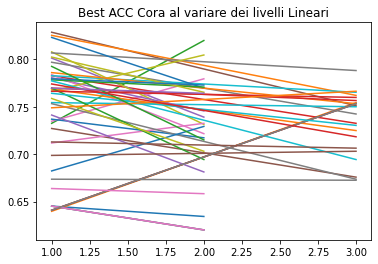

In [67]:
for d in dizionario:
  if "BestACC" in dizionario[d].keys():
    x=dizionario[d]["LivelliLineari"]
    y1=dizionario[d]["BestACC"]
    plt.title("Best ACC Cora al variare dei livelli Lineari")
    plt.plot(x,y1)
    #plt.plot(x,y1,label=d)
    plt.savefig('coraBestAccVariazioneLineari.png')
    #plt.legend(loc="lower right")

#CONSIDERO LA VARIAZIONE DEI HEAD E BLOCCO TUTTI ALTRI PARAMETRI

In [83]:
dizionario={}
for data in [dataframeCora]:
  numf=data["NumFeatures"][0]
  if numf>3000: dataset="Citeseer"
  else: dataset="Cora"
  for a in ["BestAUC","BestACC"]:
    path=pathplot+dataset+"/Variazione Head "+a
    #os.makedirs(path) 
    for f in fatrid:
      for livelligat in livgat:
        for livlineari in livlin:
          for outf in outfeat:
            df=data
            df=df.loc[df[out]==outf]
            df=df.loc[df[lg]==livelligat]
            df=df.loc[df[ll]==livlineari]
            df=df.loc[df[fr]==f]
            if len(df)>1:
              x = df[h]
              y1 = df[a]
              d={}
              d["Head"]=list(x)
              d[a]=list(y1)
              dizionario[a+" modello LivelliGat: "+str(livelligat)+" LibelliGat: "+str(livelligat)+" OutFeat: "+str(outf)+" FattoreRiduzione: "+str(f)]=d
              title=dataset+" " +a+" VARIAZIONE DI HEAD \n LivelliGat: "+str(livelligat)+" LivelliLineari: "+str(livlineari)+" OutFeat: "+str(outf)+" FattoreRiduzione: "+str(f)
              save=dataset+" " +a+" VARIAZIONE DI HEAD LivelliGat: "+str(livelligat)+" LivelliLineari: "+str(livlineari)+" OutFeat: "+str(outf)+" FattoreRiduzione: "+str(f)
              '''plt.figure()
              plt.title(title) 
              plt.xlabel('HEAD', fontsize=12)
              plt.ylabel(a, fontsize=12)
              plt.plot(x,y1)
              plt.savefig(path+"/"+save+'.png')'''

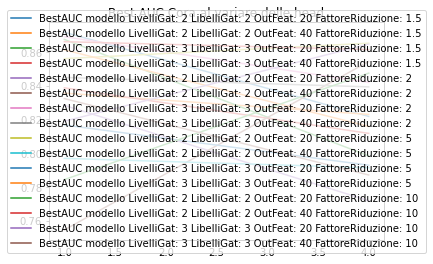

In [91]:
for d in dizionario:
  if "BestAUC" in dizionario[d].keys():
    x=dizionario[d]["Head"]
    y1=dizionario[d]["BestAUC"]
    plt.title("Best AUC Cora al variare delle head")
    #plt.plot(x,y1)
    plt.plot(x,y1,label=d)
    plt.savefig('coraBestAucVariazioneHeadModelli.png')
    #plt.savefig('coraBestAucVariazioneHead.png')
    plt.legend(loc="center")

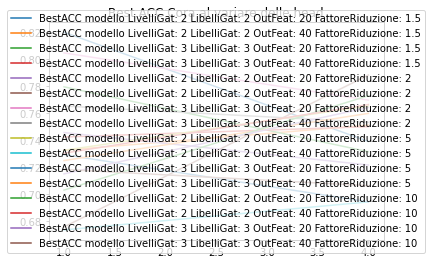

In [90]:
for d in dizionario:
  if "BestACC" in dizionario[d].keys():
    x=dizionario[d]["Head"]
    y1=dizionario[d]["BestACC"]
    plt.title("Best ACC Cora al variare delle head")
    #plt.plot(x,y1)
    plt.plot(x,y1,label=d)
    plt.savefig('coraBestAccVariazioneHeadModelli.png')
    #plt.savefig('coraBestAccVariazioneHead.png')
    plt.legend(loc="center")

#CONSIDERO LA VARIAZIONE DEI OUTPUT E BLOCCO TUTTI ALTRI PARAMETRI

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

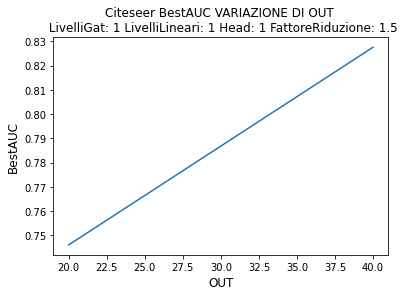

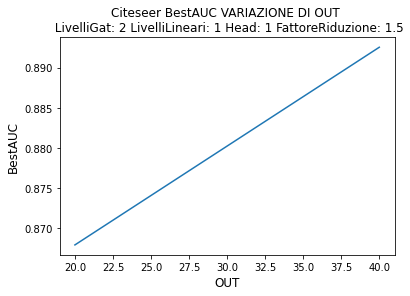

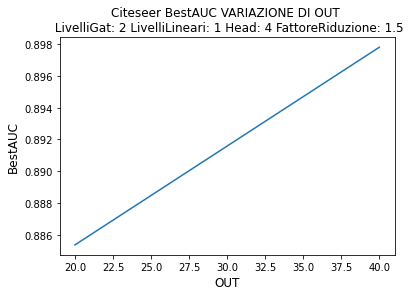

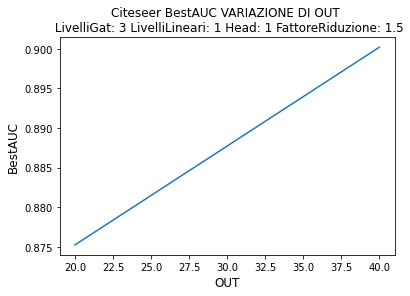

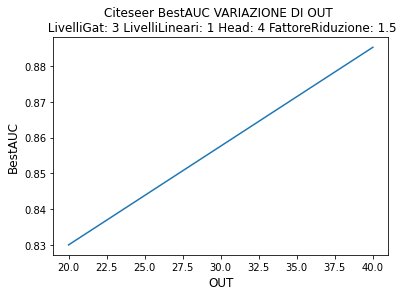

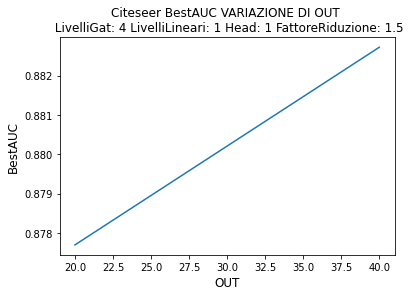

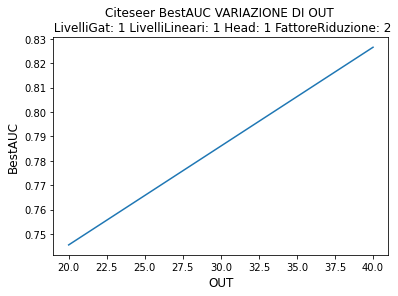

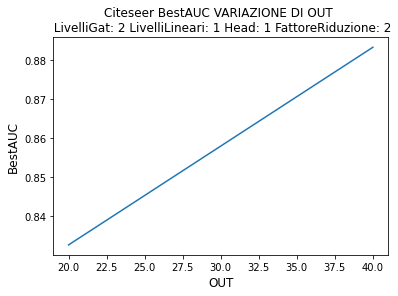

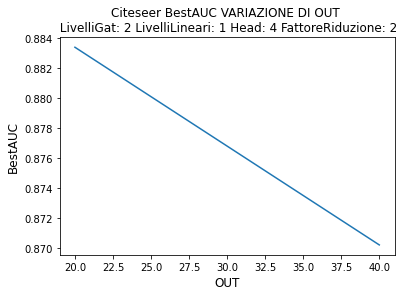

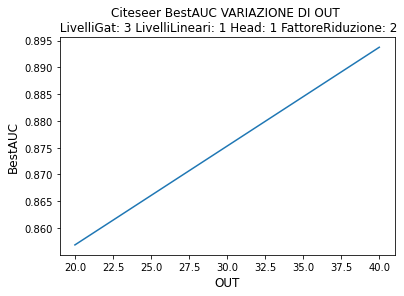

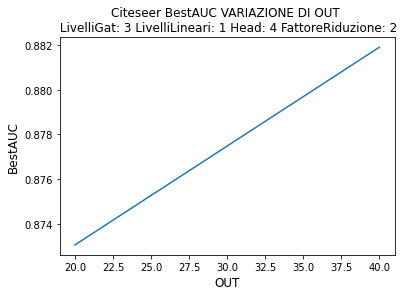

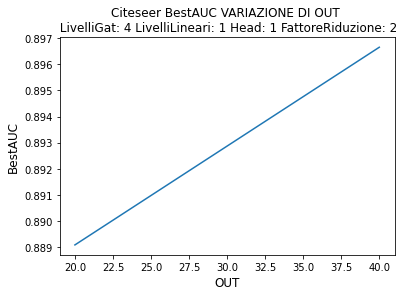

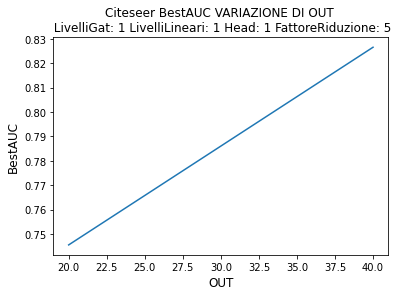

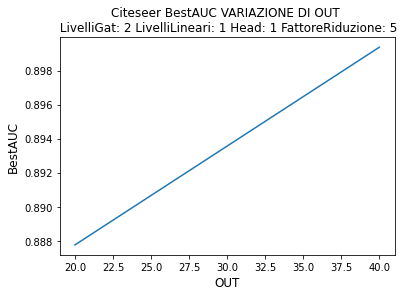

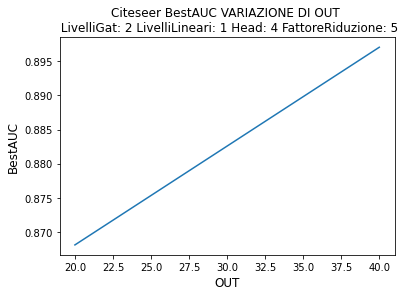

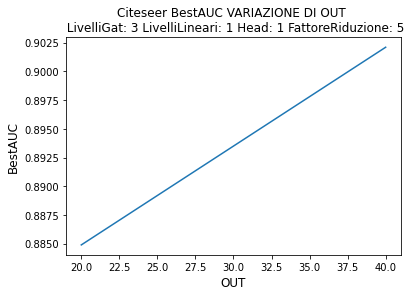

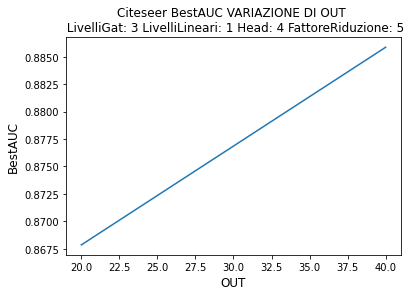

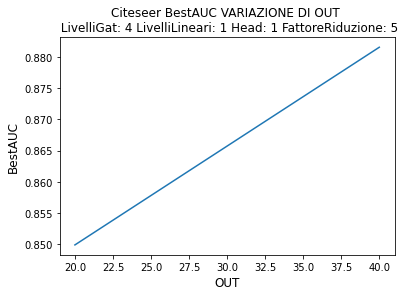

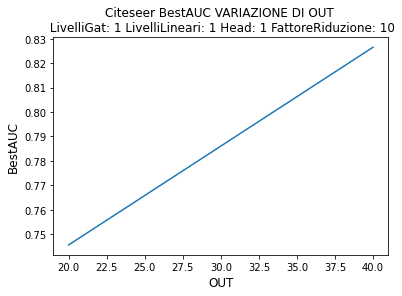

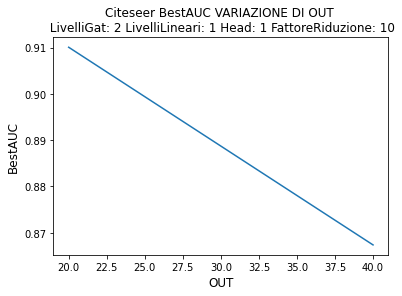

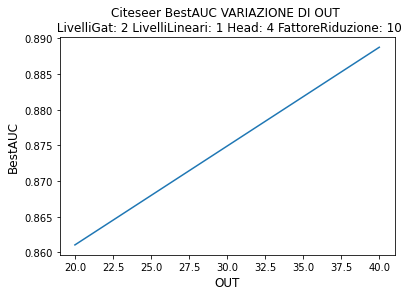

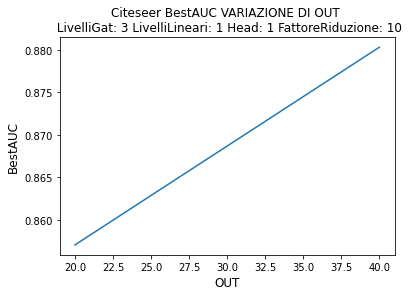

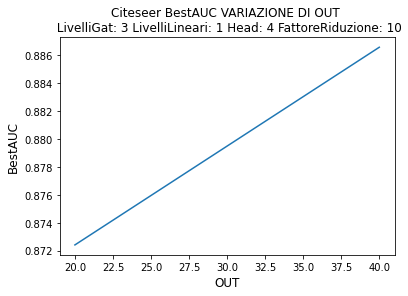

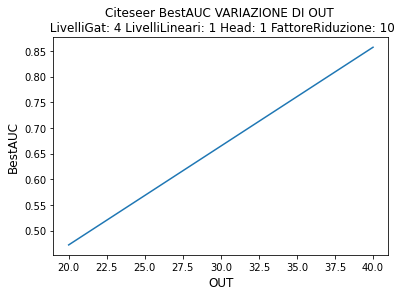

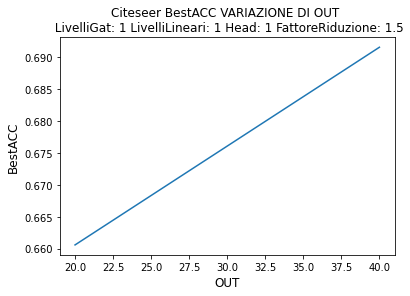

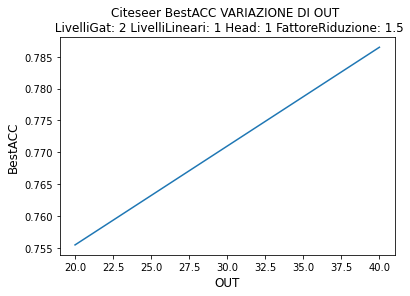

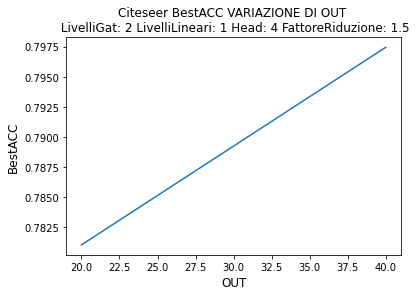

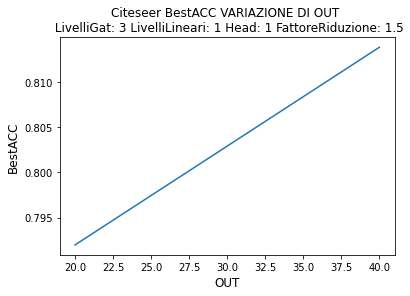

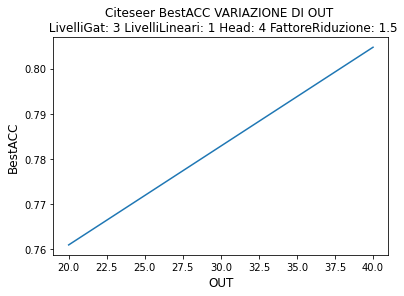

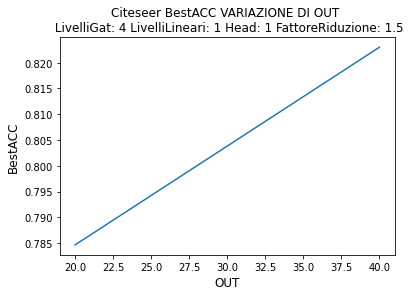

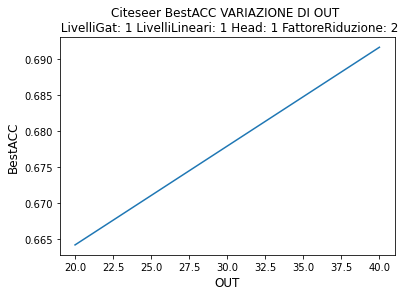

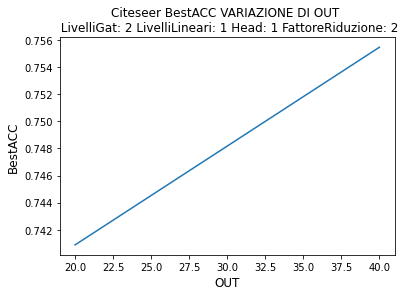

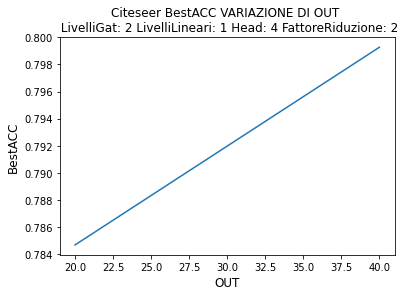

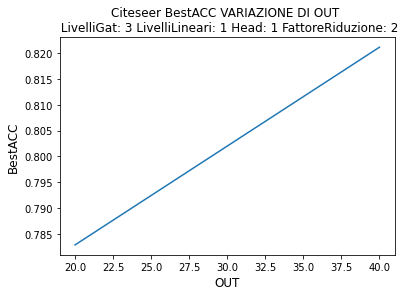

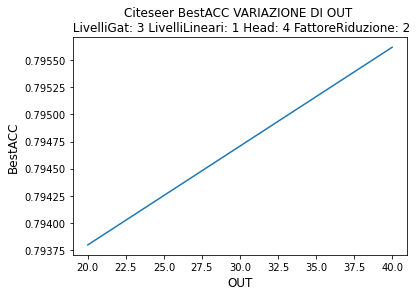

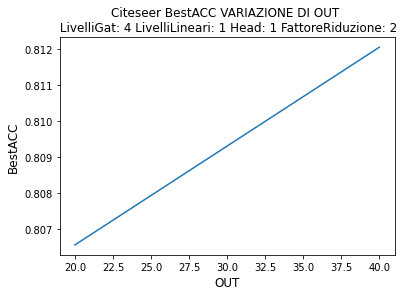

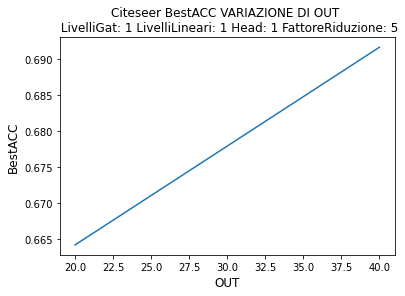

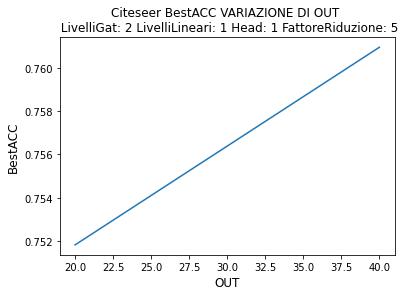

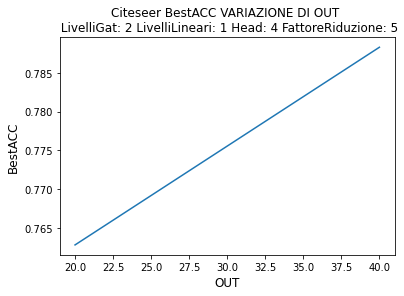

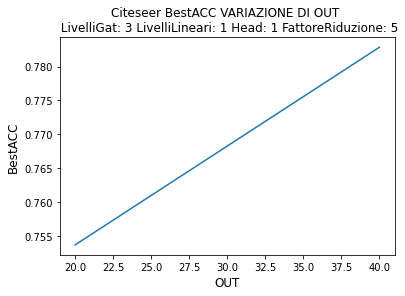

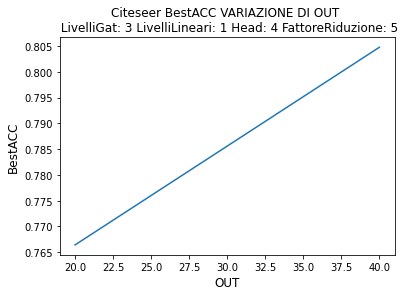

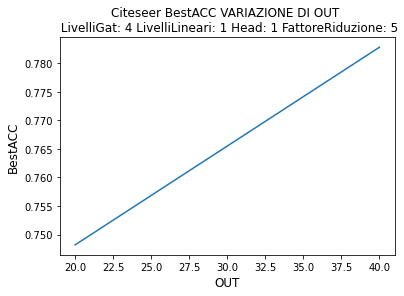

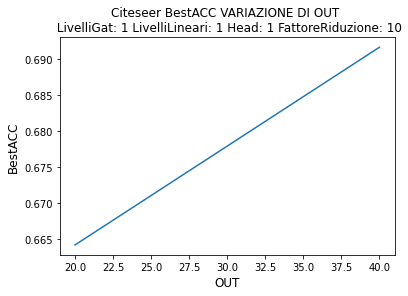

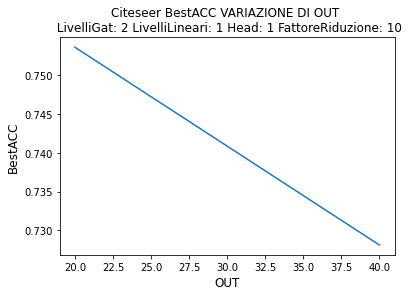

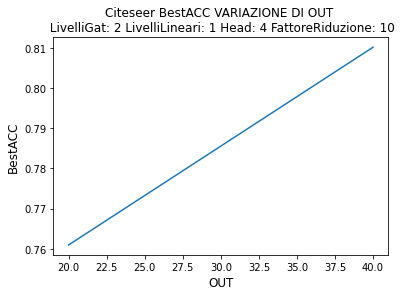

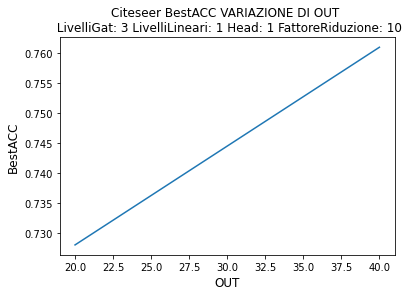

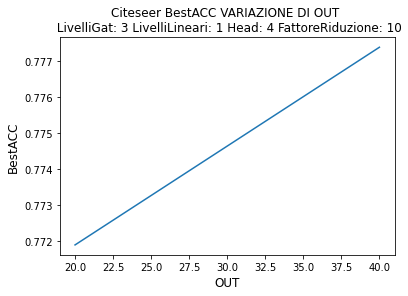

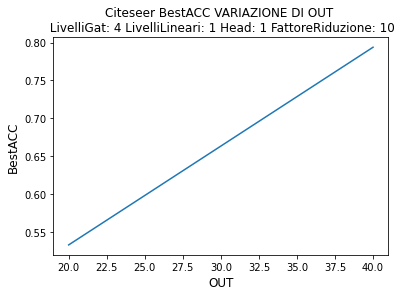

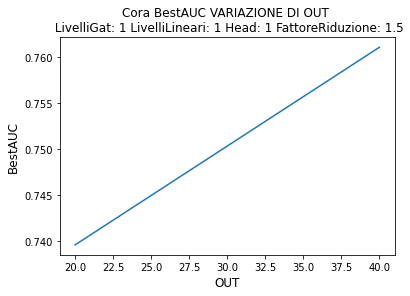

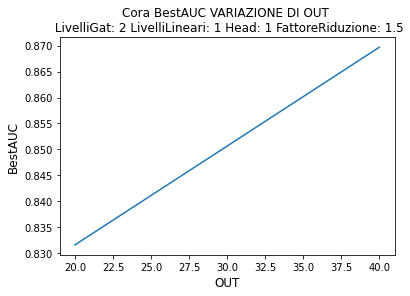

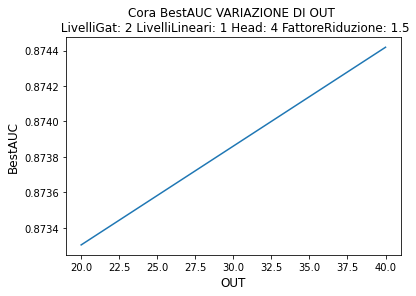

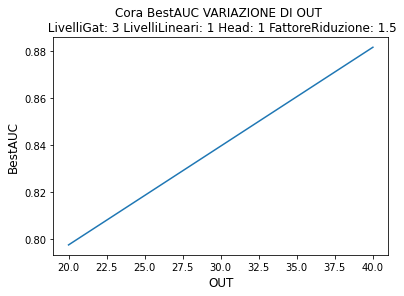

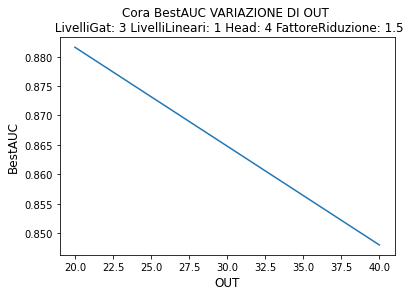

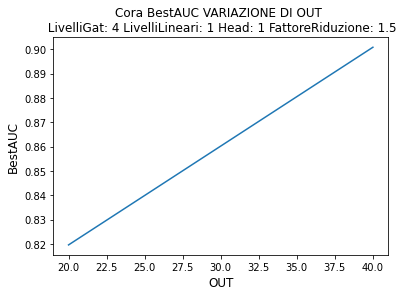

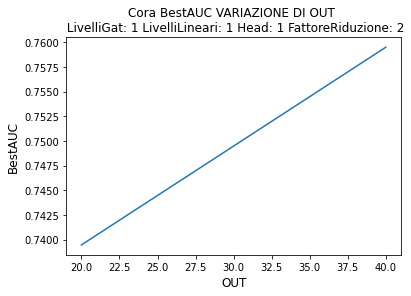

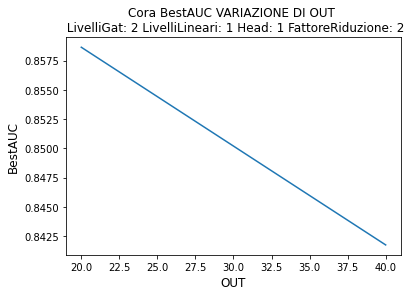

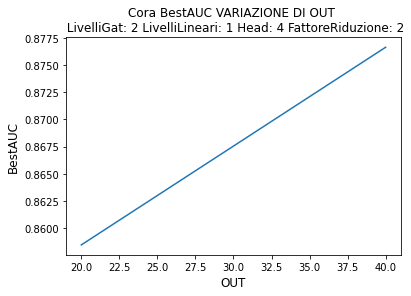

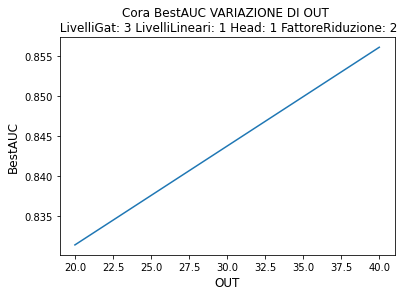

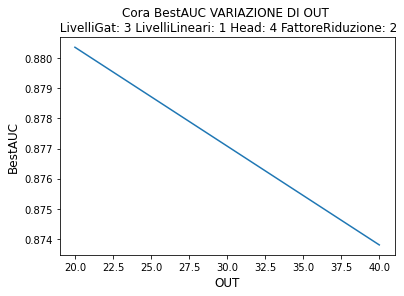

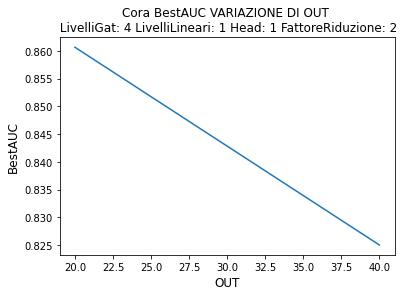

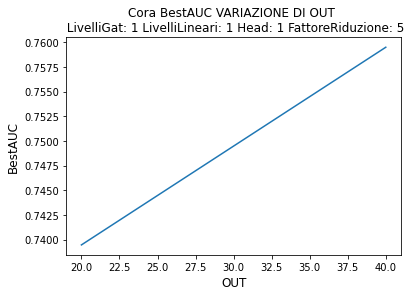

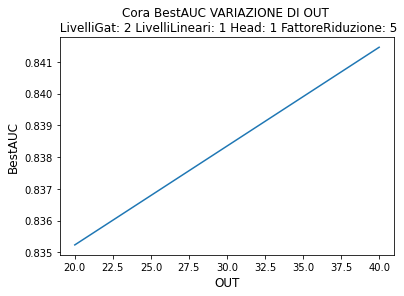

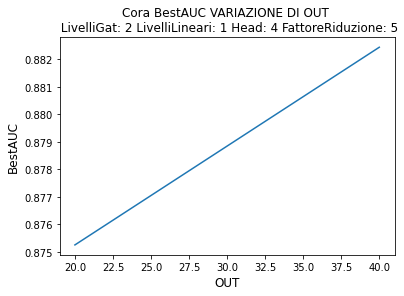

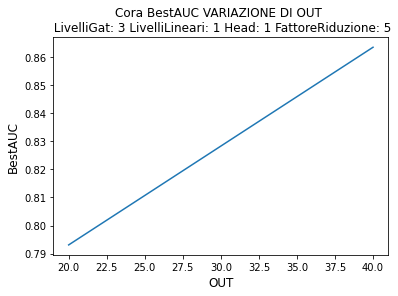

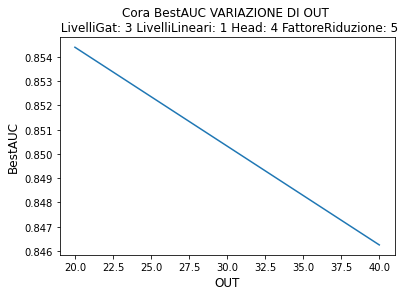

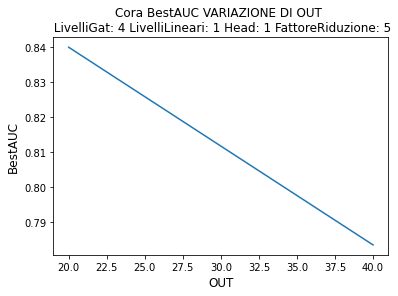

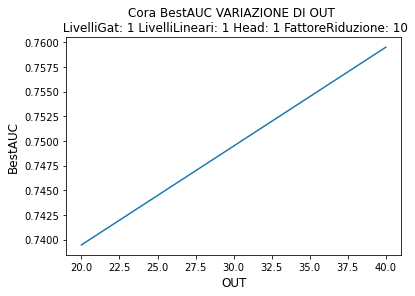

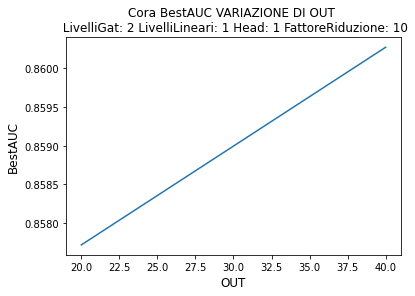

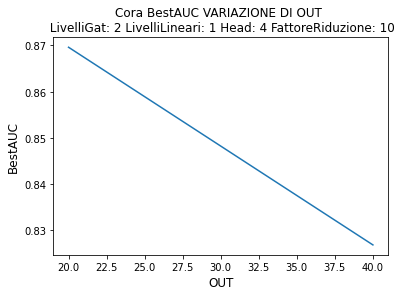

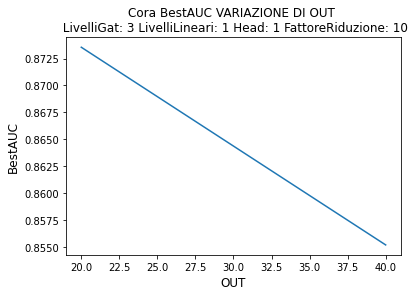

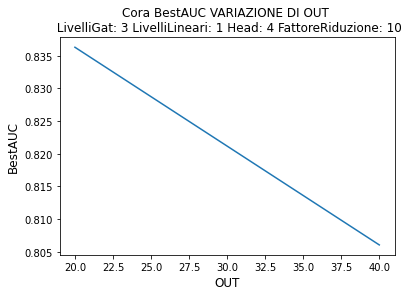

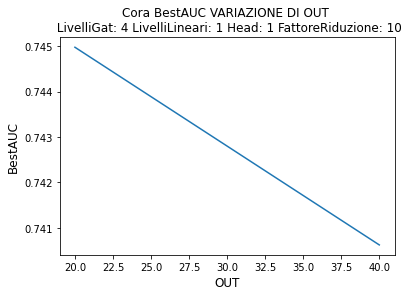

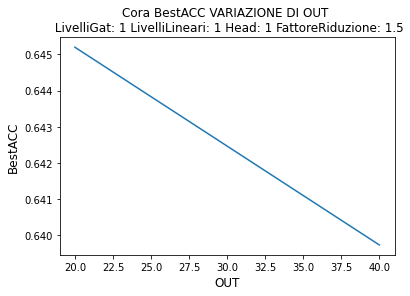

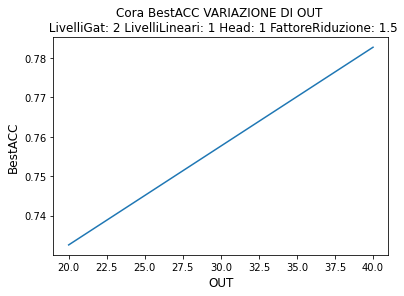

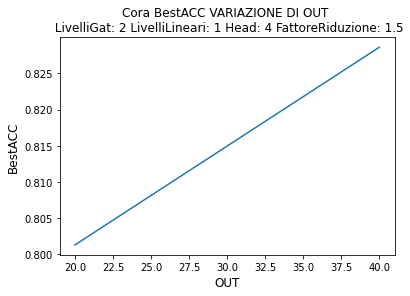

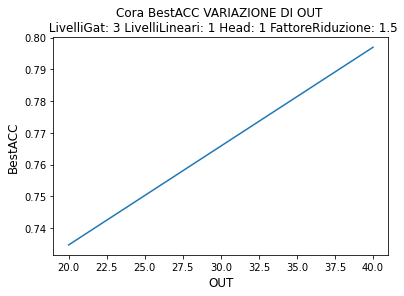

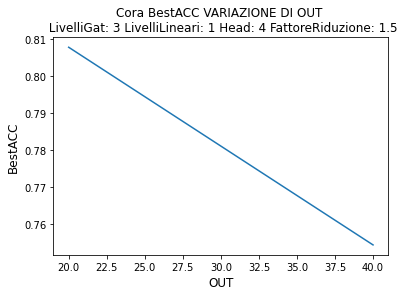

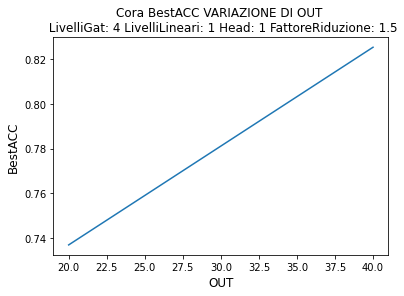

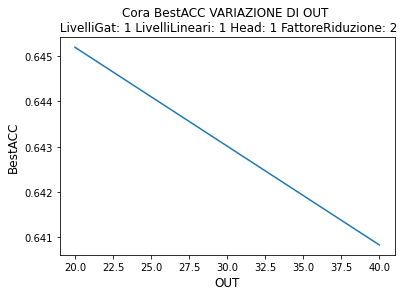

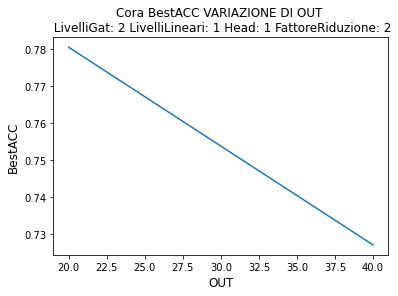

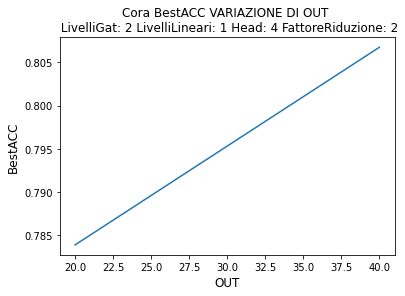

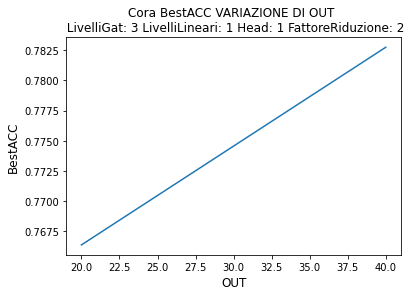

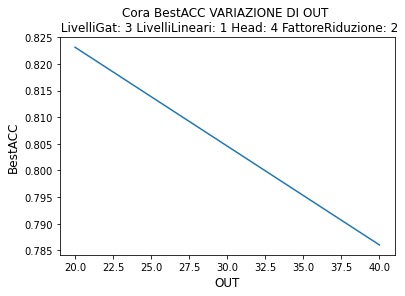

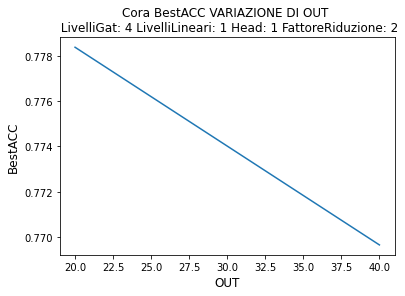

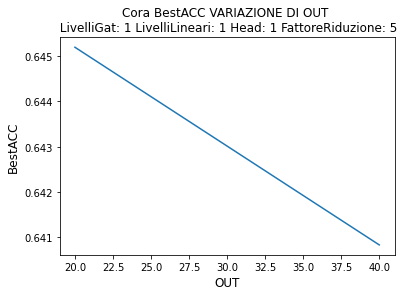

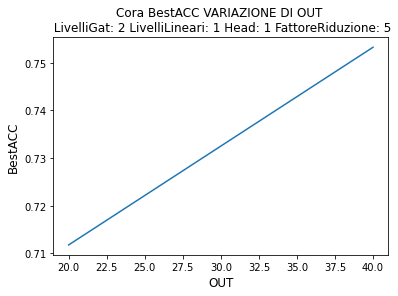

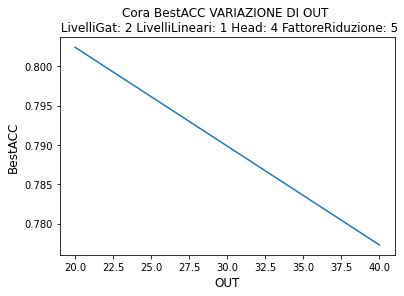

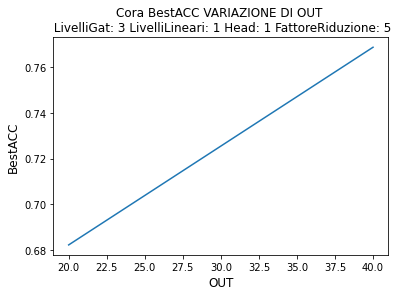

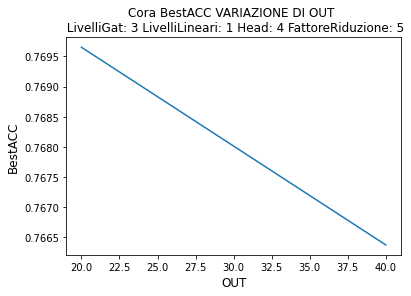

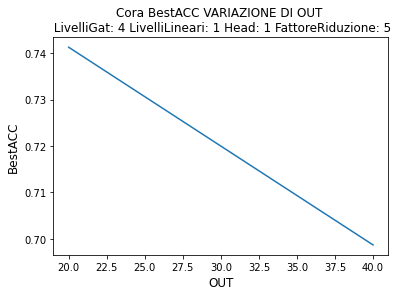

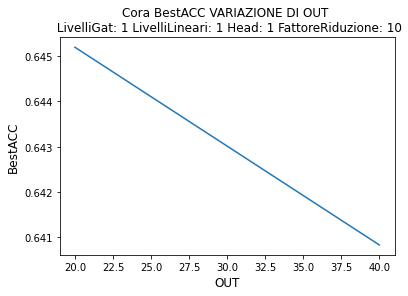

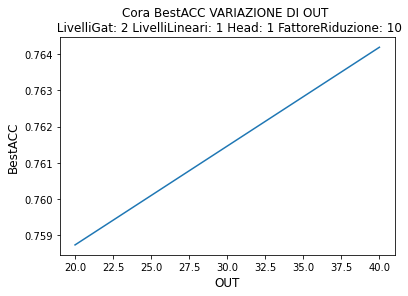

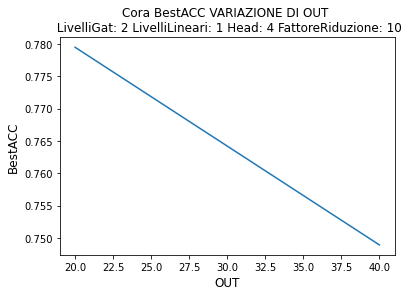

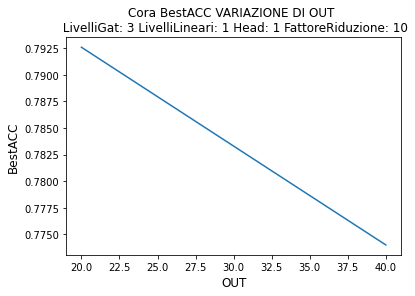

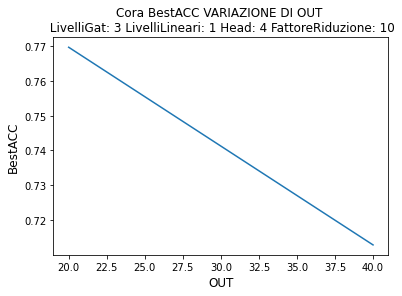

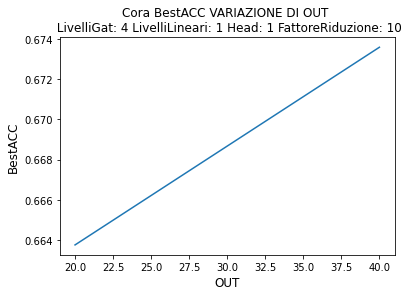

In [ ]:
for data in [dataframeCitesser,dataframeCora]:
  numf=data["NumFeatures"][0]
  if numf>3000: dataset="Citeseer"
  else: dataset="Cora"
  for a in ["BestAUC","BestACC"]:
    path=pathplot+dataset+"/Variazione OutputFeature "+a
    os.makedirs(path) 
    for f in fatrid:
      for livelligat in livgat:
        for livlineari in livlin:
          for he in head:
            df=data
            df=df.loc[df[h]==he]
            df=df.loc[df[lg]==livelligat]
            df=df.loc[df[ll]==livlineari]
            df=df.loc[df[fr]==f]
            if len(df)>1:
              x = df[out]
              y1 = df[a]
              title=dataset+" " +a+" VARIAZIONE DI OUT \n LivelliGat: "+str(livelligat)+" LivelliLineari: "+str(livlineari)+" Head: "+str(he)+" FattoreRiduzione: "+str(f)
              save=dataset+" " +a+" VARIAZIONE DI OUT LivelliGat: "+str(livelligat)+" LivelliLineari: "+str(livlineari)+" Head: "+str(he)+" FattoreRiduzione: "+str(f)
              plt.figure()
              plt.title(title) 
              plt.xlabel('OUT', fontsize=12)
              plt.ylabel(a, fontsize=12)
              plt.plot(x,y1)
              plt.savefig(path+"/"+save+'.png')

#CONSIDERO LA VAR DEI FATTORI DI RIDUZIONE E BLOCCO TUTTI ALTRI PARAMETRI

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

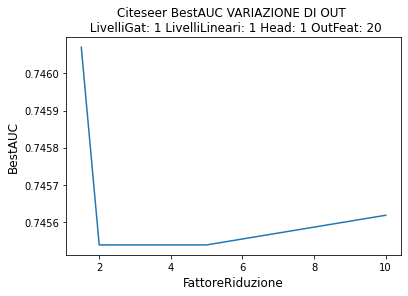

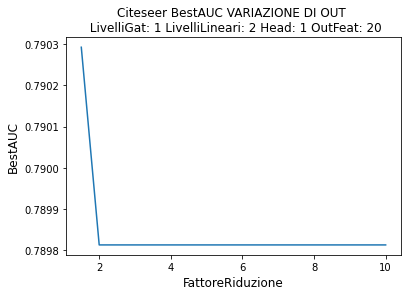

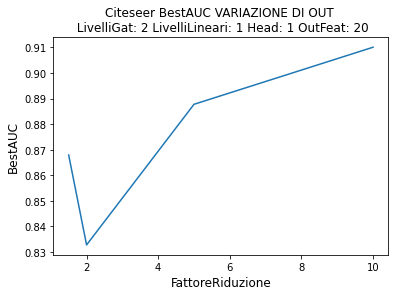

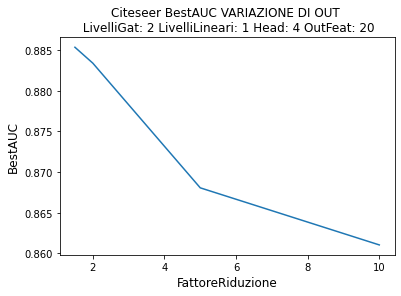

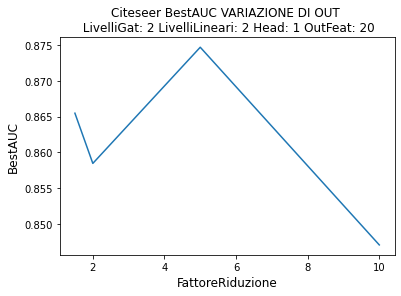

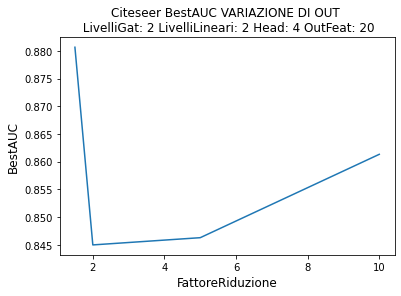

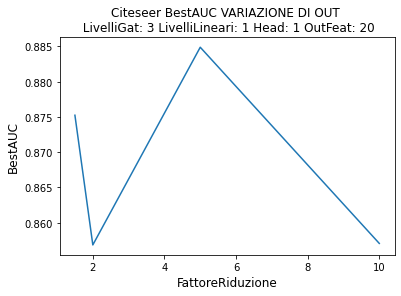

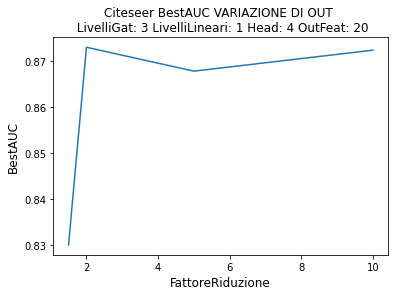

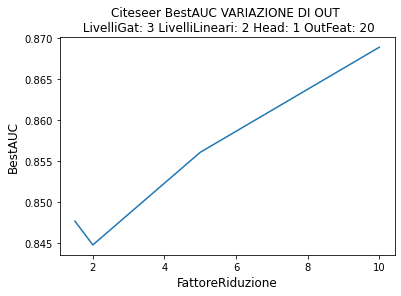

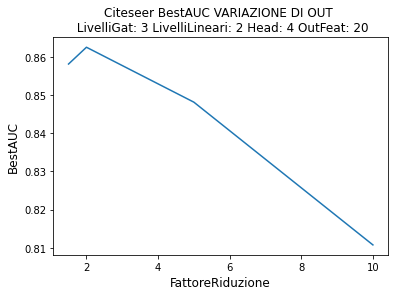

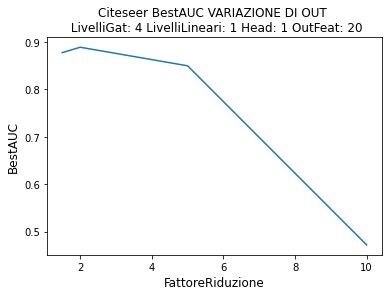

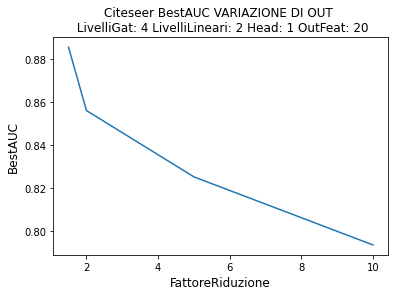

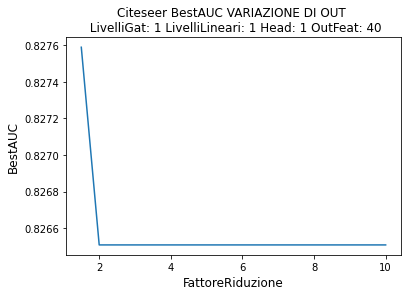

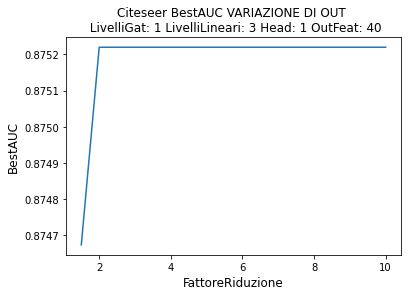

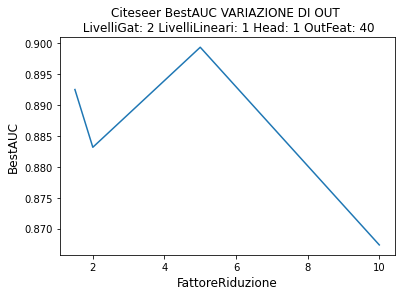

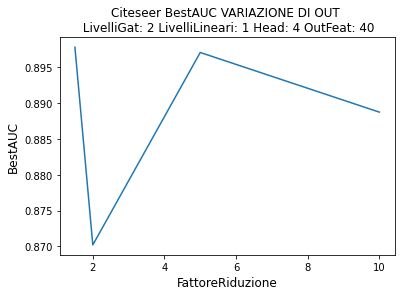

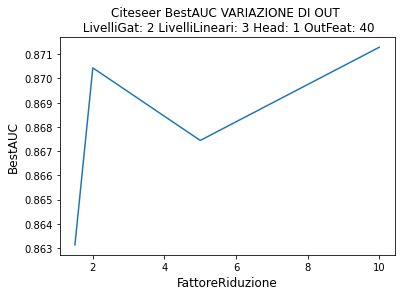

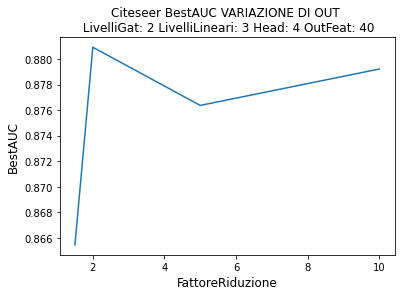

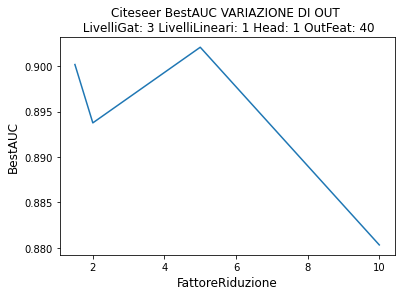

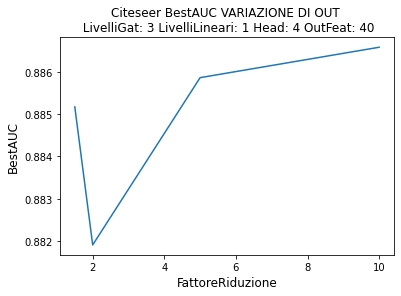

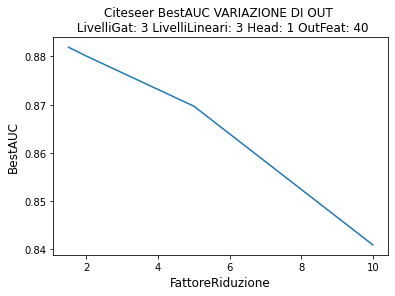

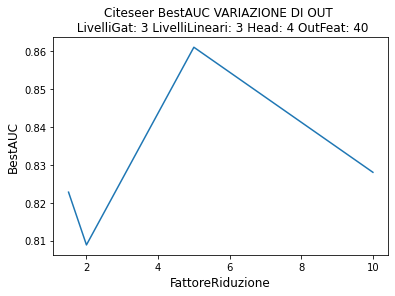

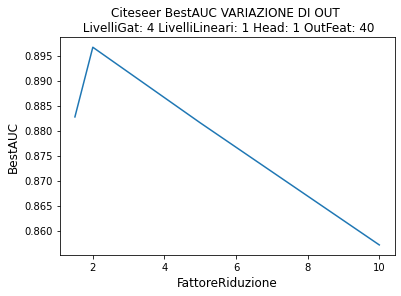

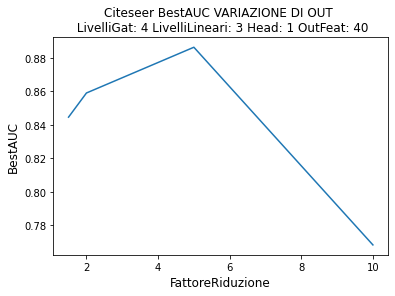

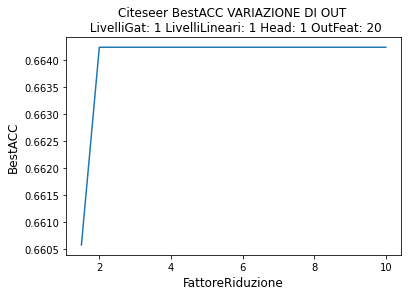

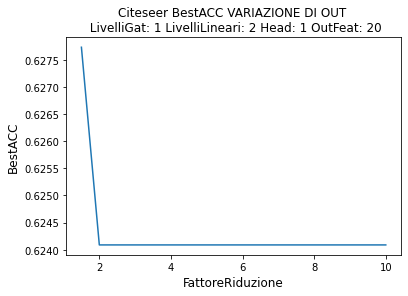

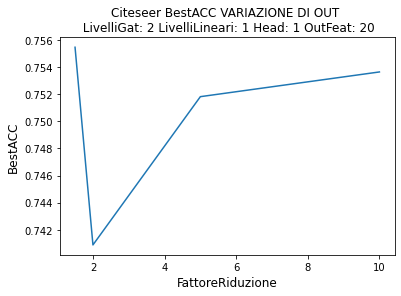

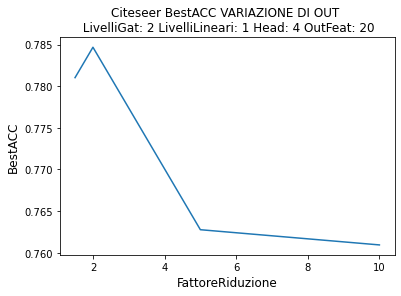

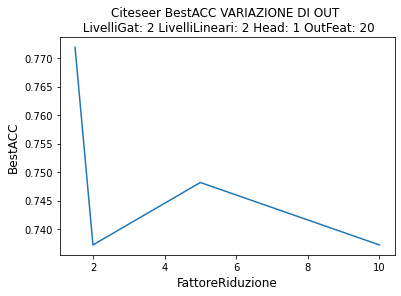

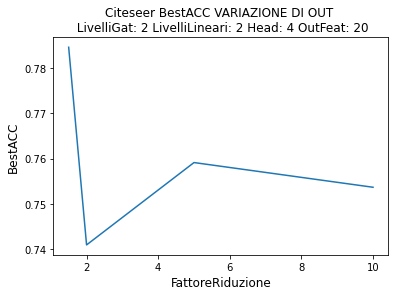

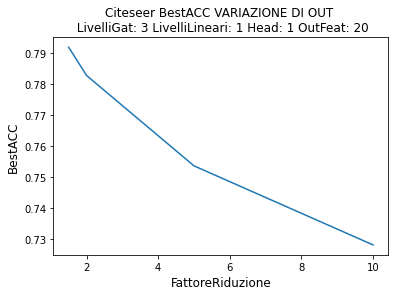

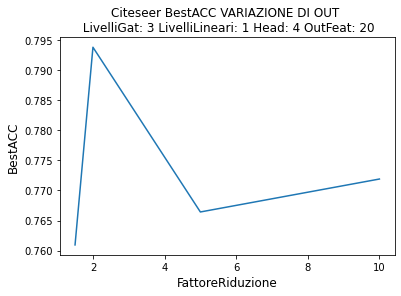

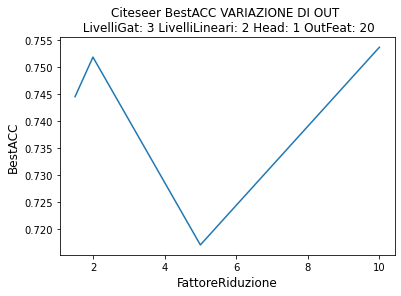

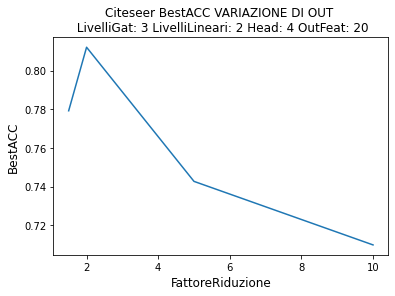

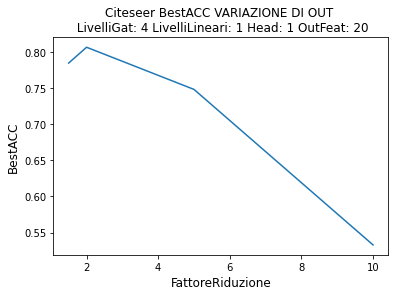

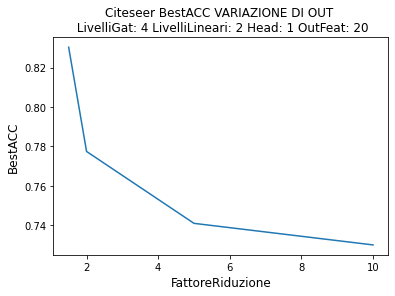

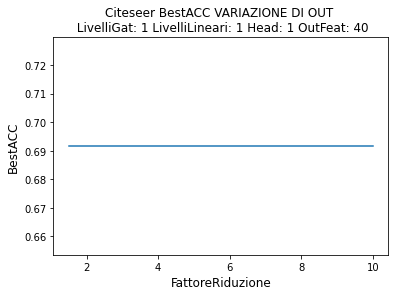

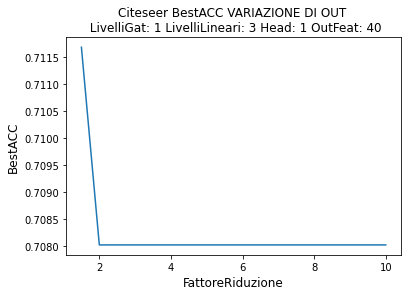

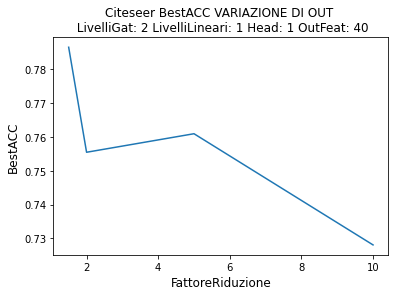

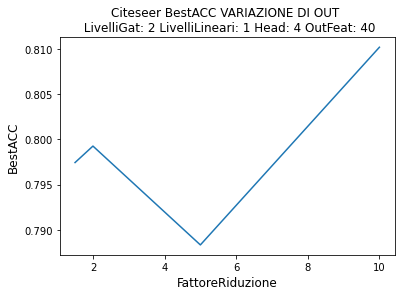

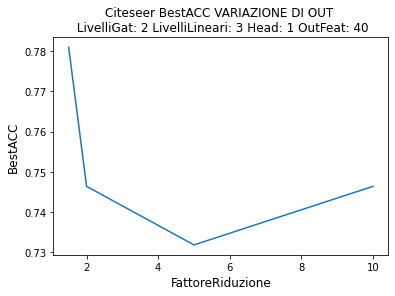

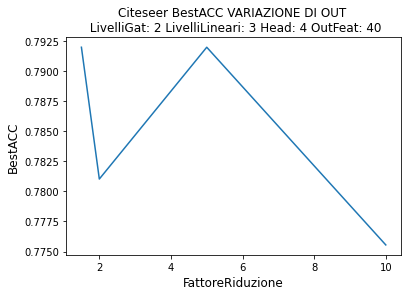

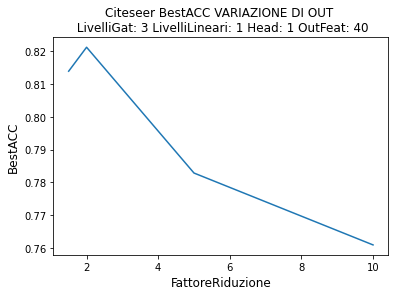

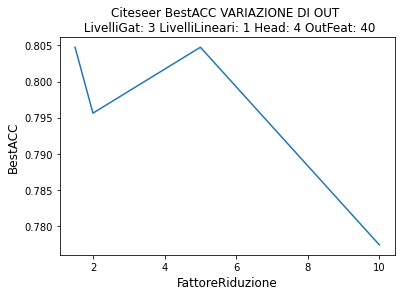

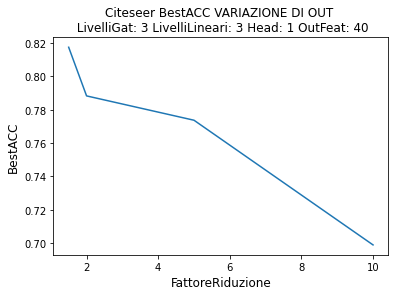

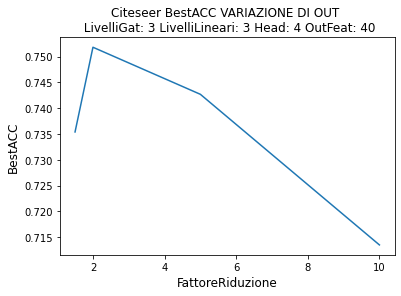

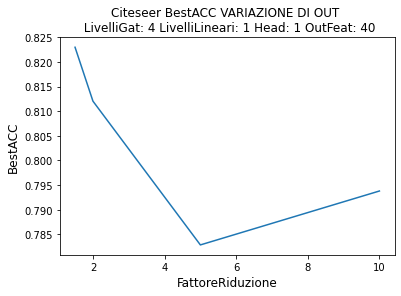

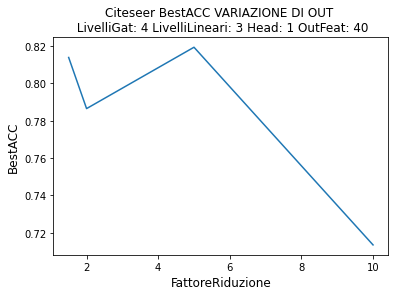

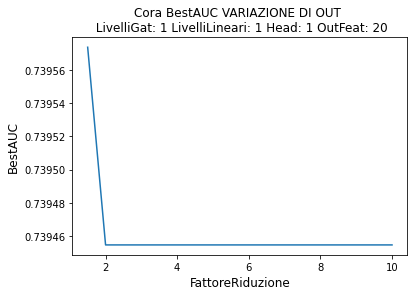

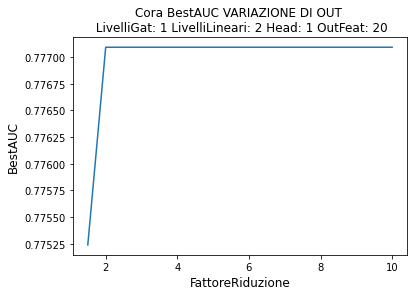

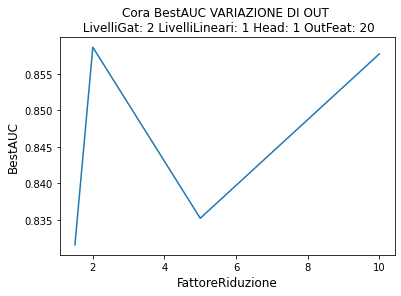

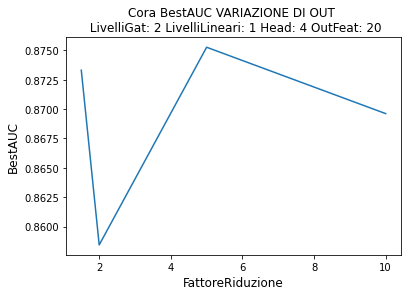

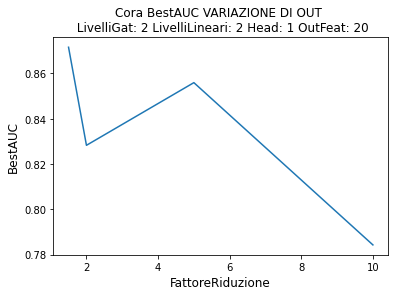

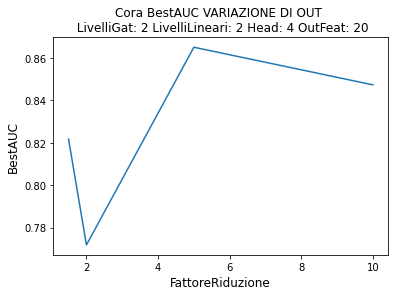

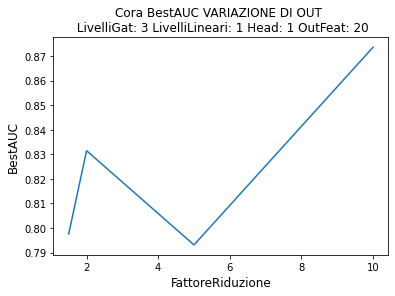

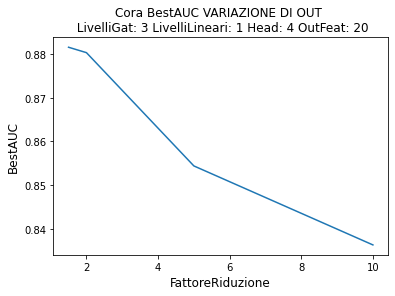

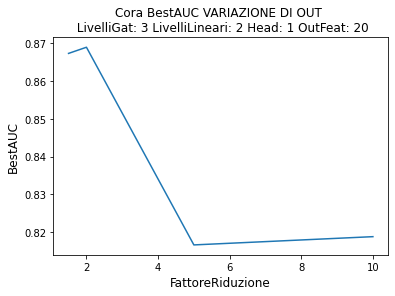

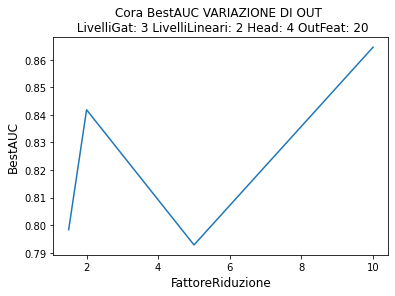

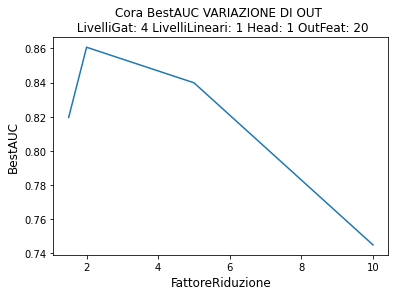

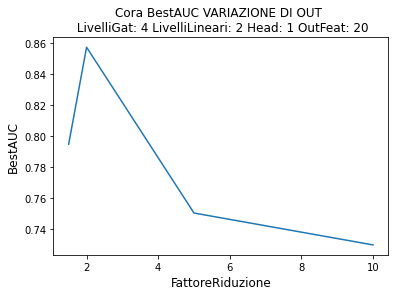

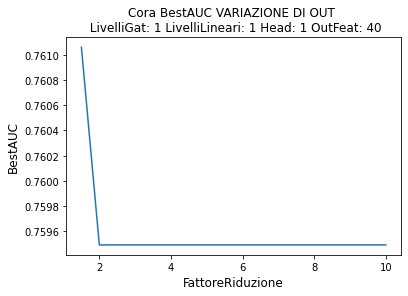

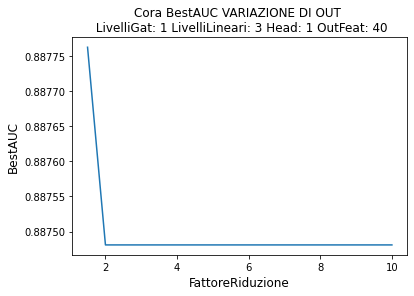

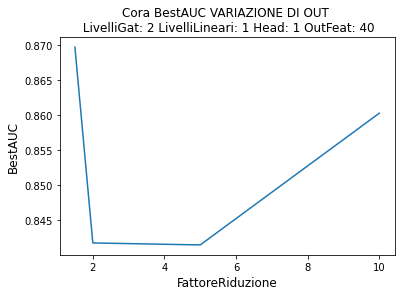

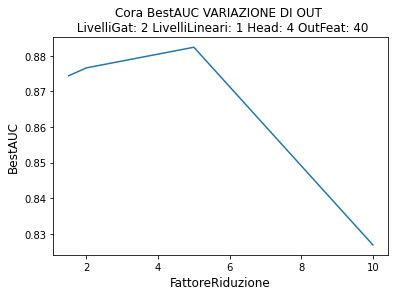

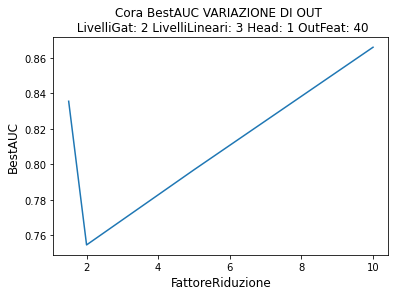

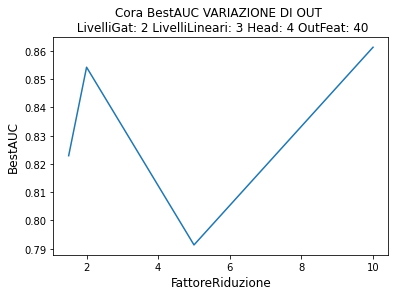

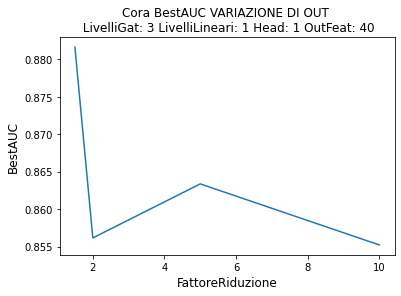

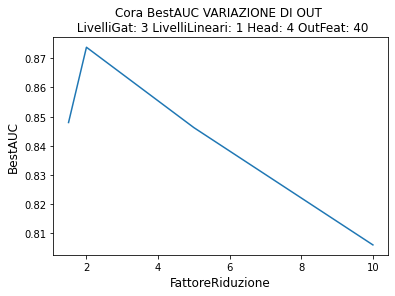

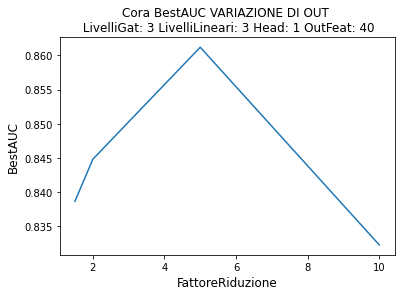

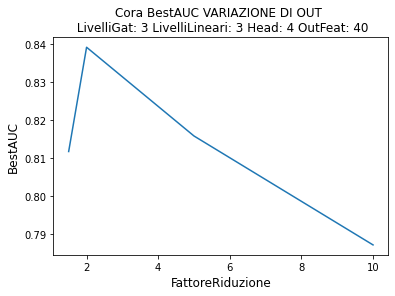

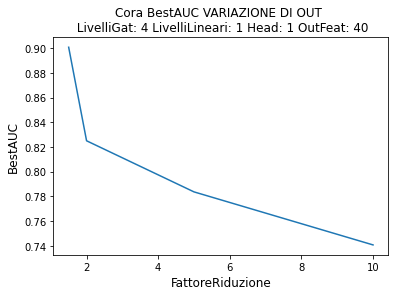

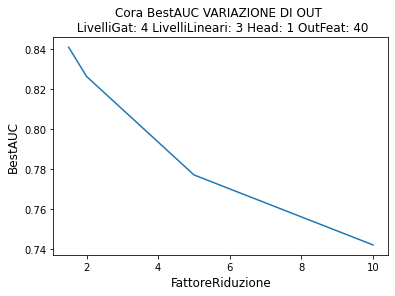

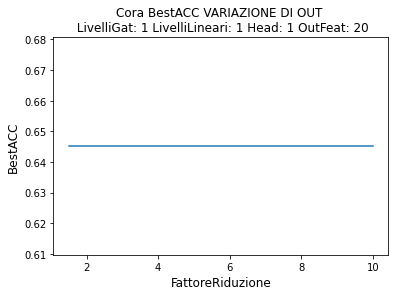

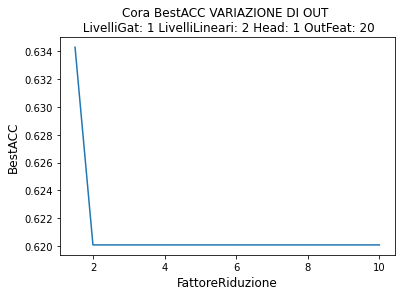

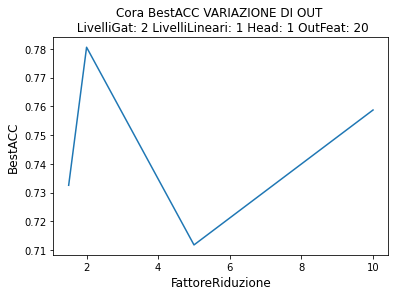

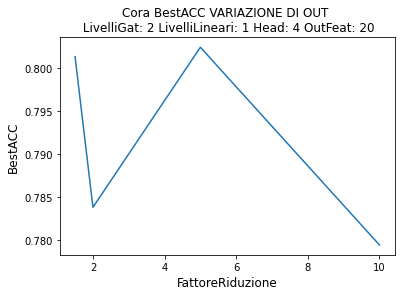

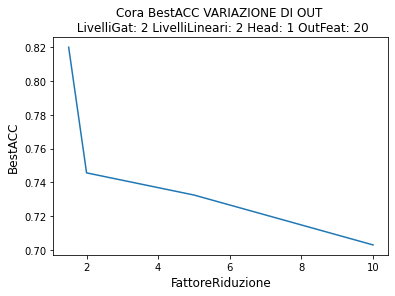

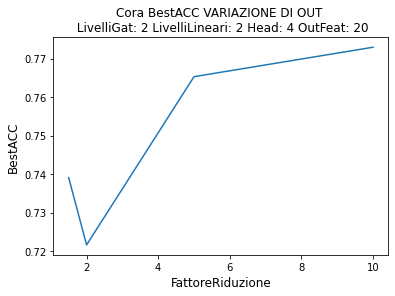

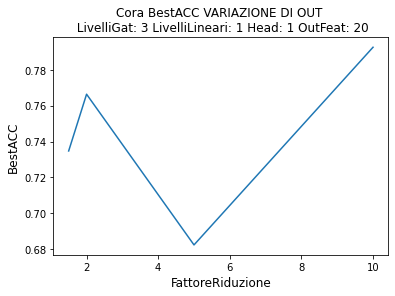

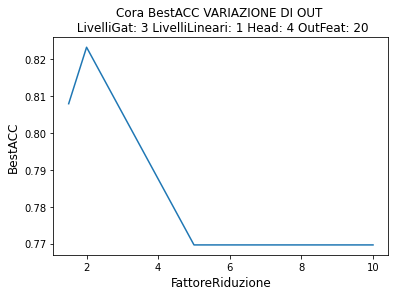

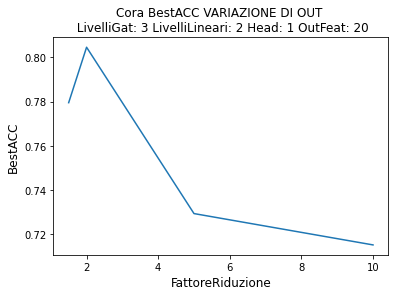

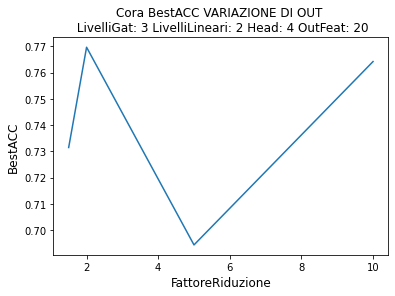

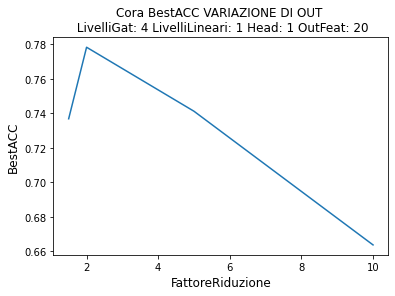

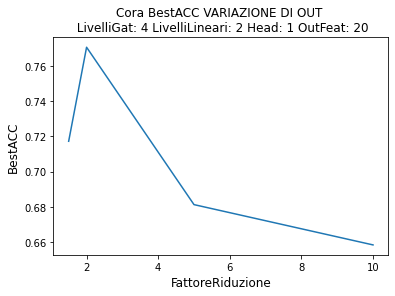

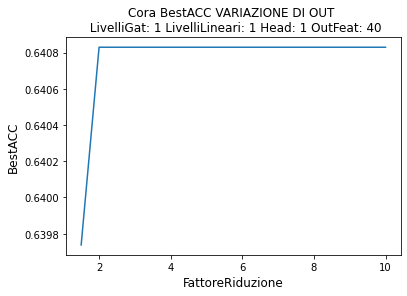

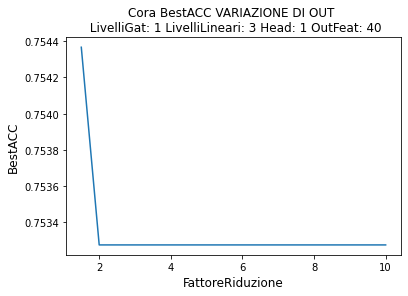

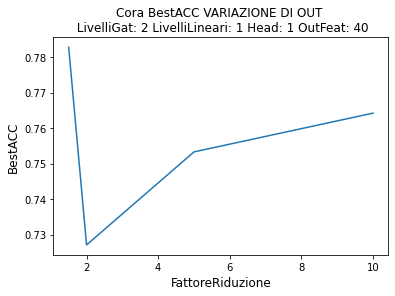

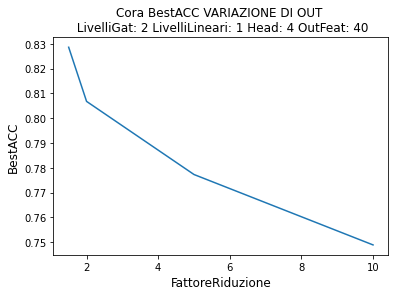

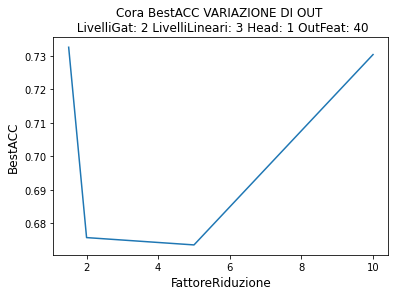

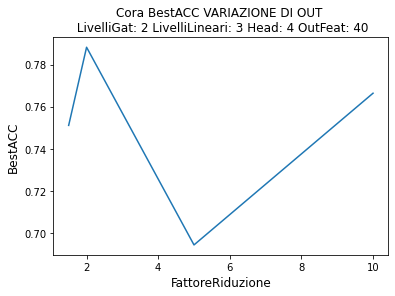

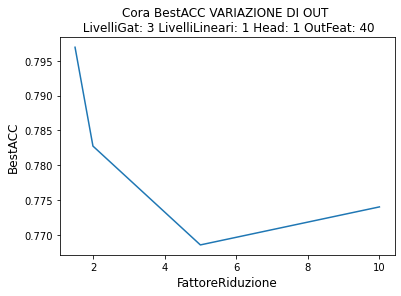

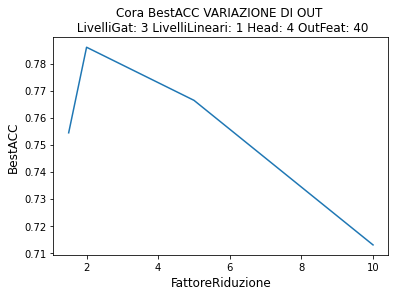

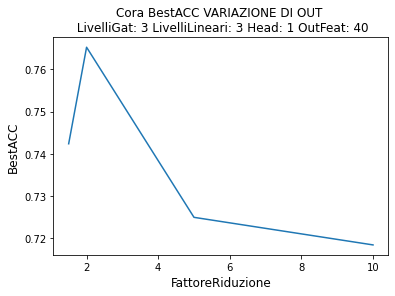

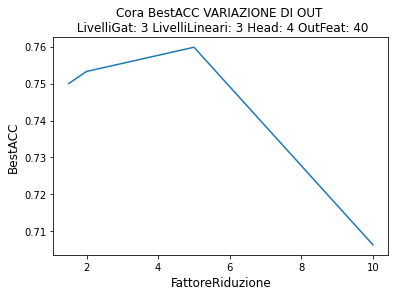

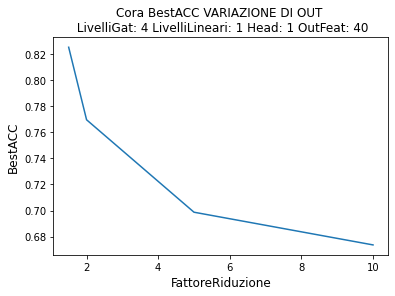

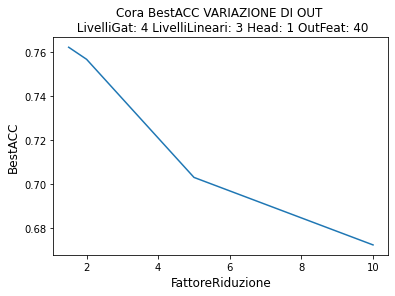

In [ ]:
for data in [dataframeCitesser,dataframeCora]:
  numf=data["NumFeatures"][0]
  if numf>3000: dataset="Citeseer"
  else: dataset="Cora"
  for a in ["BestAUC","BestACC"]:
    path=pathplot+dataset+"/Variazione FattoreRiduzione "+a
    os.makedirs(path) 
    for outf in outfeat:
      for livelligat in livgat:
        for livlineari in livlin:
          for he in head:
            df=data
            df=df.loc[df[h]==he]
            df=df.loc[df[lg]==livelligat]
            df=df.loc[df[ll]==livlineari]
            df=df.loc[df[out]==outf]
            if len(df)>1:
              x = df[fr]
              y1 = df[a]
              title=dataset+" " +a+" VARIAZIONE DI FATTORE RIDUZIONE \n LivelliGat: "+str(livelligat)+" LivelliLineari: "+str(livlineari)+" Head: "+str(he)+" OutFeat: "+str(outf)
              save=dataset+" " +a+" VARIAZIONE DI FATTORE RIDUZIONE LivelliGat: "+str(livelligat)+" LivelliLineari: "+str(livlineari)+" Head: "+str(he)+" OutFeat: "+str(outf)
              plt.figure()
              plt.title(title) 
              plt.xlabel('FattoreRiduzione', fontsize=12)
              plt.ylabel(a, fontsize=12)
              plt.plot(x,y1)
              plt.savefig(path+"/"+save+'.png')

#PARAMETRI MODELLO

In [ ]:
#CALCOLA I PARAMETRI PER IL MODELLO ------------------------------------------------------------------------------------------------
inOutDim=[] #contiene i valori in out delle varie gat
head=[5,4,1]  # metto gli head in base a quanti ne metto ho diversi layer 
#head=[1]
layerGat=len(head)# quanti layer gat ho

outputGat=20 # output dell'ultima gat
linear=[outputGat,10] # vari in out dei livelli lineari 20->50 50->10 ecc l'ultimo di default nel modello viene messo a 1 

#linear=[outputGat]
layerLin=len(linear) # prendo il numero di livelli 
featureInputSize=datasetsubgrafi["train"].x.size()[1] #1433 è il primo in della gat, è il num di feature 
inOutDim.append(featureInputSize) # metto come primo valore 1433

#s=round(featureInputSize/layer)
for i in range(1,layerGat):
  inOutDim.append(round(inOutDim[i-1]/2))

In [ ]:
prova=GAT(layerGat, outputGat ,inOutDim,head,layerLin,linear)
print(prova)
prova=None